In [21]:
sys.path.append("..")
import os
import utils
import plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data from Norway

In [23]:
data_daily = pd.read_csv("../data/fhi_data_daily.csv")
data_daily = data_daily[data_daily.year.astype(int) < 2021].reset_index()
data_daily = data_daily[['date', 'I_new', 'I_cumulative', 'D_new', 'D_cumulative']]
data_daily.date = data_daily['date'].apply(lambda x: 
                                        x.split("/")[1].zfill(2) + "/"
                                        + x.split("/")[0].zfill(2) + "/"
                                        + x.split("/")[2].zfill(2))
print(data_daily.head())

         date  I_new  I_cumulative  D_new  D_cumulative
0  21/02/2020    1.0           1.0    0.0           0.0
1  22/02/2020    0.0           1.0    0.0           0.0
2  23/02/2020    0.0           1.0    0.0           0.0
3  24/02/2020    0.0           1.0    0.0           0.0
4  25/02/2020    0.0           1.0    0.0           0.0


### Read output from simulations

In [25]:
dir_path = "../"
relative_path = "results/50_simulations_no_vaccines_2021_05_27_18_58_21"
path = dir_path + relative_path
mdp_paths_path   =   f"{path}/mdp_paths.pkl"
mdp_reffs_path   =   f"{path}/mdp_reffs.pkl"
start_date_population_age_labels_path = f"{path}/start_date_population_age_labels.pkl"

paths = utils.create_named_tuple('paths', 'filepaths.txt')
config = utils.create_named_tuple('config', paths.config)

start_date, population, age_labels = utils.read_pickle(start_date_population_age_labels_path)
mdp_paths = utils.read_pickle(mdp_paths_path)
R_effs = utils.read_pickle(mdp_reffs_path)
mdp_path = mdp_paths[-1]
R_eff = R_effs[-1]

dates = []
final_deaths = np.zeros((len(mdp_paths),len(mdp_paths[0])))
final_infected = np.zeros((len(mdp_paths),len(mdp_paths[0])))
for i in range(len(mdp_paths)):
    for j in range(len(mdp_paths[0])):
        if i == 0:
            dates.append(mdp_paths[i][j].date.strftime('%d/%m/%Y'))
        final_deaths[i][j] = np.sum(mdp_paths[i][j].new_deaths)
        final_infected[i][j] = np.sum(mdp_paths[i][j].new_infected)
    

In [ ]:
final_deaths.shape

### Find cumulative cases of deaths and infected from model

In [45]:
percentile_limit=90

cumulative_deaths = final_deaths.cumsum(axis=1)
deaths_mean = final_deaths.mean(axis=0)
cumulative_deaths_mean = cumulative_deaths.mean(axis=0)
u_percentile_deaths = np.percentile(final_deaths, percentile_limit, axis=0)
l_percentile_deaths = np.percentile(final_deaths, 100-percentile_limit, axis=0)
u_percentile_deaths_cum = np.percentile(deaths_cumulative, percentile_limit, axis=0)
l_percentile_deaths_cum = np.percentile(deaths_cumulative, 100-percentile_limit, axis=0)

cumulative_infected = final_infected.cumsum(axis=1)
infected_mean = final_infected.mean(axis=0)
cumulative_infected_mean = cumulative_infected.mean(axis=0)
u_percentile_infected = np.percentile(final_infected, percentile_limit, axis=0)
l_percentile_infected = np.percentile(final_infected, 100-percentile_limit, axis=0)
u_percentile_infected_cum = np.percentile(infected_cumulative, percentile_limit, axis=0)
l_percentile_infected_cum = np.percentile(infected_cumulative, 100-percentile_limit, axis=0)

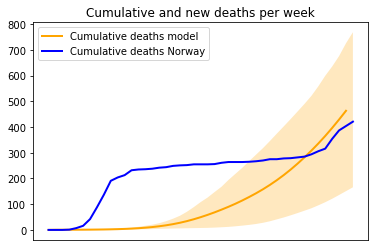

In [56]:
fig, ax = plt.subplots(1)
#ax.plot(dates, deaths_mean, lw=2, label='Deaths model', color='blue')
ax.plot(dates[:-1], deaths_mean_cumulative[:-1], lw=2, label='Cumulative deaths model', color='orange')
ax.plot(dates, data_daily.D_cumulative.to_numpy(dtype=int)[::7], lw=2, label='Cumulative deaths Norway', color='blue')
#ax.fill_between(dates, u_percentile_deaths, l_percentile_deaths, facecolor='blue', alpha=0.25)
ax.fill_between(dates, u_percentile_deaths_cum, l_percentile_deaths_cum, facecolor='orange', alpha=0.25)
#ax.set_title(r'Cumulative and new deaths per week')
ax.legend(loc='upper left')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.savefig("../deaths_comparison.png")

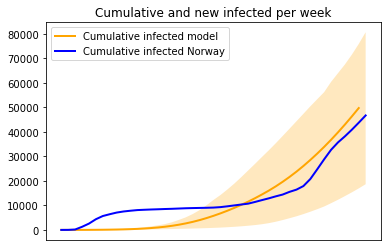

In [57]:
fig, ax = plt.subplots(1)
#ax.plot(dates, deaths_mean, lw=2, label='Deaths model', color='blue')
ax.plot(dates[:-1], infected_mean_cumulative[:-1], lw=2, label='Cumulative infected model', color='orange')
ax.plot(dates, data_daily.I_cumulative.to_numpy(dtype=int)[::7], lw=2, label='Cumulative infected Norway', color='blue')
#ax.fill_between(dates, u_percentile_deaths, l_percentile_deaths, facecolor='blue', alpha=0.25)
ax.fill_between(dates, u_percentile_infected_cum, l_percentile_infected_cum, facecolor='orange', alpha=0.25)
#ax.set_title(r'Cumulative and new infected per week')
ax.legend(loc='upper left')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.savefig("../infected_comparison.png")